In [2]:
import sympy # sympy 라는 모듈을 불러온다.
import numpy # sympy 라는 모듈을 불러온다.
import matplotlib.pylab as plt # matplotlib 에서의 pylab 모듈을 plt 라는 이름으로 불러온다.

print("프로그램 실행 준비 완료!") # 완료되었음을 알려준다.

프로그램 실행 준비 완료!


In [3]:
v0 = float(input("자동차의 초기속도(km/h) : ")) # 자동차의 초기속도를 입력받는다.
v0 = v0 * 1000 / 3600 # km/h 를 m/s 로 바꿔준다.
t0 = float(input("브레이크를 밟기까지의 시간 : ")) # 브레이크를 밟기까지의 시간을 입력받는다.
g = float(input("중력가속도의 크기 (기본값 : 9.80665, 0입력시) : ")) # 중력가속도의 크기를 입력받는다.
if not g: # 만약 g가 없거나 0이라면
  g = 9.80665 # g는 9.80665 이다.

u = float(input("도로의 마찰계수(기본값 : 1, 0입력시) : ")) # 마찰계수의 크기를 입력받는다.
if not u: # 만약 u가 없거나 0이라면
  u = 1 # u는 1이다.

a = g * u # a는 g와 u를 곱한 값이다.

자동차의 초기속도(km/h) : 72
브레이크를 밟기까지의 시간 : 1
중력가속도의 크기 (기본값 : 9.80665, 0입력시) : 10
도로의 마찰계수(기본값 : 1, 0입력시) : 0.8


In [4]:
gongju_distance = v0 * t0 # 공주거리를 구한것이다.
t = sympy.symbols('t') # 미지수를 t로 설정한것이다.
ft = -a * t + v0 # 함수를 정의해준다. (변수명에 괄호를 못넣어서 f(t) 를 ft 로 표현한것이다.)

print(f"속도함수 : {ft}") # f(t)를 출력한다.


속도함수 : 20.0 - 8.0*t


In [5]:
ft0 = 0 # 위의 ft 식이 0일때의 t값을 구하기위해 ft = 0 의 형으로 풀수있도록 0 을 만든다.
T = sympy.solve((ft, ft0)) # ft 와 ft0 를 같다고 두고 (ft = ft0) t의값을 구한다.
t1 = T.get(t) # sympy.solve 의 반환값은 dict 형태임으로, dict에서 원하는 값을 뽑아낸다.
print(f"제동시간 : {t1}") # 제동시간을 출력한다.

Ft = sympy.integrate(ft, t) # ft를 t에 대하여 부정적분한다. (부정적분을 한뒤, 0을 대입하면 값이 0이기 때문에 (속도함수를 적분하면 거리함수인데, 0초에서는 간 거리가 0이기 때문이다.), 적분상수를 만들지 않는 integrate() 함수를 사용한다.)

braking_distance = Ft.subs(t, t1) # 제동거리는 f(t)를 0에서 t1(제동시간)까지를 정적분 한것인데, 이것을 계산한것은 F(t) 에 t1 을 대입한것과 값이 같다. (적분상수가 어차피 0 이기 때문이다.)
print(f"제동거리 : {braking_distance}") # 제동거리를 출력한다.

stopping_distance = gongju_distance + braking_distance # 정지거리는 공주거리 + 제동거리 이다.
print(f"정지거리 : {stopping_distance}")


print(f"거리함수 : {Ft}") # 거리함수를 출력한다.

print(f"속도함수 : {ft}") # 직관성을 위해 위에서 구한 속도함수를 다시 출력한다.

vt = sympy.Derivative(ft, t).doit() # f(t)를 t에 대해 미분한다.
print(f"가속도함수 : {vt}") # 속도함수를 미분하면 가속도함수가 되고, 그 함수를 출력한다.


제동시간 : 2.50000000000000
제동거리 : 25.0000000000000
정지거리 : 45.0000000000000
거리함수 : -4.0*t**2 + 20.0*t
속도함수 : 20.0 - 8.0*t
가속도함수 : -8.00000000000000


==================== 거리 그래프 ====================


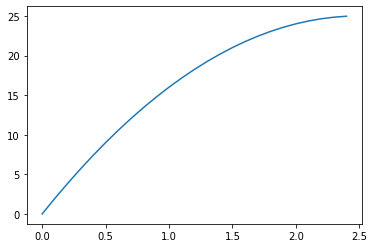

In [6]:
print("==================== 거리 그래프 ====================") # 괄호안의 값을 출력한다.
x = numpy.arange(0.0, round(t1, 1), 0.1) # numpy 모듈을 이용하여 0.0 에서 t의값 까지 0.1 간격의 수들을 list(리스트)형태로 x 에 넣는다.
y = [Ft.subs(t, i) for i in x] # 이 문법은 list comprehension 이라는 문법인데, 간단히 말하자면 리스트 안에 값들을 넣는것이다.
plt.plot(x, y) # 그래프를 그려주는 모듈인 matplotlib 의 pylab 안에있는 plot 함수를 사용한다.
plt.show() # 그래프를 출력한다.

==================== 속도 그래프 ====================


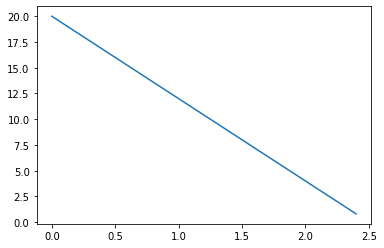

In [7]:
print("==================== 속도 그래프 ====================")
x = numpy.arange(0.0, round(t1, 1), 0.1)
y = [ft.subs(t, i) for i in x]
plt.plot(x, y)
plt.show()

==================== 가속도 그래프 ====================


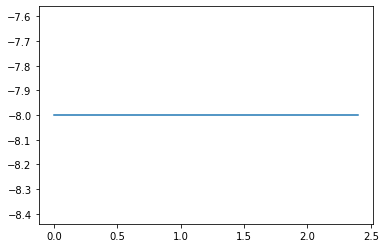

In [8]:
print("==================== 가속도 그래프 ====================")
x = numpy.arange(0.0, round(t1, 1), 0.1)
y = [vt.subs(t, i) for i in x]
plt.plot(x, y)
plt.show()

In [9]:
while True: # 무한히 반복한다.
  a = input("추가로 계산하시겠습니까? (y/n): ") # 값을 입력받는다!
  if a == "y": # 만약 입력받은 값이 y라면
    print("제일위의 코드부터 다시 실행해주세요!") # 출력한다.
    break # 반복문을 탈출한다.(멈춘다)
  elif a == "n": # 만약 입력받은 값이 n이라면
    print("수고하셨습니다.") # 출력한다.
    break # 반복문을 탈출한다.

추가로 계산하시겠습니까? (y/n): a
추가로 계산하시겠습니까? (y/n): b
추가로 계산하시겠습니까? (y/n): n
수고하셨습니다.
